# A/B Testing for Marketing


In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [46]:
# Import marketing.csv 
marketing = pd.read_csv('marketing.csv')
# Print the first five rows of the DataFrame
print(marketing.head())
# Print the statistics of all columns
print(marketing.describe())
# Check column data types and non-missing values
print(marketing.info())


      user_id date_served  ... subscribing_channel is_retained
0  a100000029      1/1/18  ...           House Ads        True
1  a100000030      1/1/18  ...           House Ads        True
2  a100000031      1/1/18  ...           House Ads        True
3  a100000032      1/1/18  ...           House Ads        True
4  a100000033      1/1/18  ...           House Ads        True

[5 rows x 12 columns]
           user_id date_served  ... subscribing_channel is_retained
count        10037       10021  ...                1856        1856
unique        7309          31  ...                   5           2
top     a100000882     1/15/18  ...           Instagram        True
freq            12         789  ...                 600        1279

[4 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              100

## What is A/B testing?

A/B testing refers to a randomized experiment which evaluates which variant performs better. In order for our tests to have meaning, we must have a clear control. The control should be something that currently exists and is running in production. Each variant in the test should have only one major change from the control; otherwise, it will be impossible to parse what led to the change in your key metrics. Prior to beginning a test, you must develop a hypothesis and determine which metric you are trying to impact. Always set key metrics ahead of running the test. It's easy to redefine success in retrospect, especially if you are under pressure to find a positive result. If you document success metrics ahead of time, you can maintain clarity around the success of the test.

## Testing allows us to understand marketing impact

A big benefit of running A/B tests is we can be confident that the increase in the relevant metrics was due to the action we took in the test.

## How long does a test need to run?

Your stakeholders will likely ask you how long a test needs to run. If a decision is needed by the end of the week, but a test would require two weeks to reach statistical significance, you should use a different methodology for this decision. Testing is popular because it can provide a definitive answer to controversial business questions, but it is only effective if tests are run properly.

## Personalized email test

A/B test that was run where half the emails were generic upsells to our product while the other half contained personalized messaging around individual usage of our site. Note that we will take a high-level look into how A/B tests are conducted in marketing departments.

## Test allocation

Before we can begin assessing the impact of the test, we must ensure the test was executed correctly. The variant column contains the group each user was allocated to. We can do so by looking at how many people were allocated to the control and personalization variants. The code should look similar to how we sliced DataFrames and used groupby in previous lessons, except this time, we are counting the unique number of users who received each variant of email. Next, let's plot the results. Since we are comparing two groups, we'll use a bar chart.

## Allocation plot

Allocation is relatively even, but not exactly the same. This will typically be the case. If you're worried allocation has gone wrong, there are statistical tests to determine the likelihood that the difference in allocation is due to random chance, but we will not explore that in this lesson. In this case, we can proceed with the assumption that there were no issues in the randomization process.

## Setting up our data to evaluate the test

First, we ensure each user and variant has only one subscription outcome by using the groupby() and max() methods. We use the max() method on the 'converted' column since it's a boolean, and if there are multiple rows with False and True values, we want to consider the row where the user was converted, that is, True. Next, we unstack the DataFrame.

## Setting up our data to evaluate the test

Finally, we create a Series of outcomes for both the control and the personalization variants. In this case, the series has a row for each user in the test which equals "True" if the user subscribed and "False" otherwise. We can use dropna() on each Series to only include conversion outcomes for all users in each variant.

## Conversion rates

We can then calculate the conversion rate by taking the mean of each Series. Is this difference significant?

### Test allocation
The email portion of this campaign was actually run as an A/B test. Half the emails sent out were generic upsells to your product while the other half contained personalized messaging around the users’ usage of the site.

Before you begin analyzing the results, you will check to ensure users were allocated equally to the test and control groups.

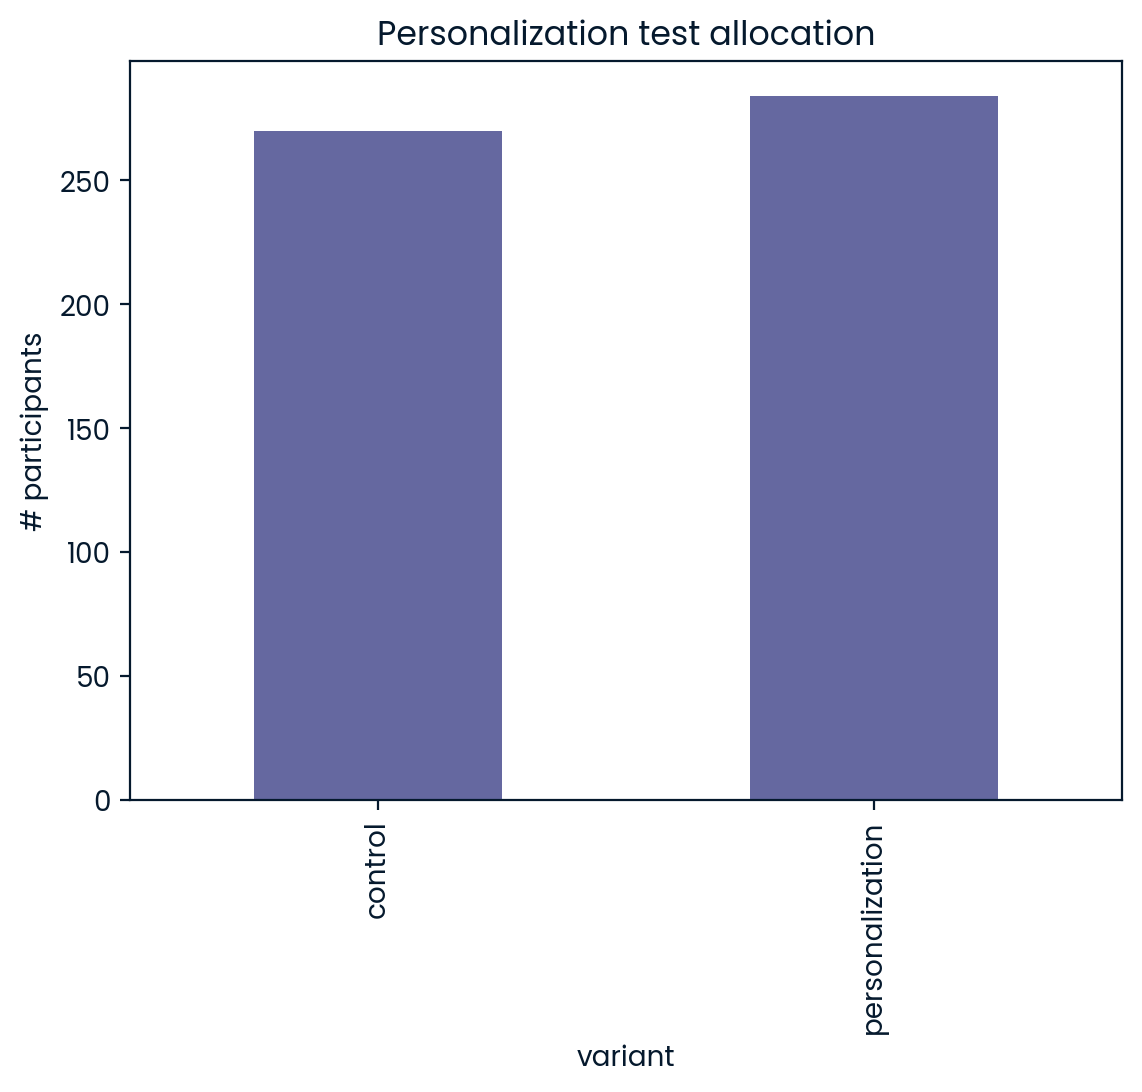

In [47]:
# Subset the DataFrame
email = marketing[marketing['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

_There's a slight difference in allocation, but it's within the expected range so you can continue with your analysis._

### Comparing conversion rates
Now that we know allocation is relatively even let's look at the conversion rate for the control and personalization. Since we chose conversion rate as our key metrics for this test, it is highly important that we evaluate whether or not conversion was higher in the personalization treatment compared with the control. While we will dive in deeper in subsequent exercises, measuring the difference between the key metric in the control and the treatment is the most important part of evaluating the success of an A/B test.

In [48]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


_You can see that personalization converted users at a higher rate than the control. Next, you will build a lift function to quantify by how much._

### Calculating lift & significance testing

Calculating lift and statistical significance.

1. Treatment performance compared to the control

The first question you'll want to answer when running a test is, "what's the lift?". In this case, what this means is, "Was the conversion rate higher for the treatment and by how much?". Lift is calculated by taking the difference between the treatment conversion rate and the control conversion rate divided by the control conversion rate. The result is the relative percent difference of treatment compared to control.

2. Calculating lift

To calculate the lift, we calculate the conversion rates of the control and the personalization groups. Then, we calculate lift using the equation from the previous slide, and we have our result! As you can see, the personalization variant improved on the control conversion rate by 194%. That's a huge improvement and a very good signal that we should consider running personalized emails again in the future. But before we get ahead of ourselves, let's talk statistical significance.

3. T-distribution

One way to calculate statistical significance is by conducting a two-sample t-test. A t-test uses the mean and the sample variance to determine the likelihood that the variation between the two samples occurred by chance. The image on the slide shows two overlapping sample distributions. The smaller the overlap between the two distributions, the more likely that there is a true difference between the two samples. I'm not going to explain the details of the t-test, but I highly recommend you do 

4. P-values

The t-test gives us a t-statistic and a p-value which allows us to estimate the likelihood of finding a result at least as extreme as the treatment in our test. While it depends on sample size and the test, typically a t-statistic of 1.96 evaluates to a p-value of 0.05, which translates to a 95% significance level, a commonly used threshold for significance tests.

5. T-test in Python

To run a t-test in Python, you can use the ttest_ind() function from the stats module of the scipy package. The function takes a list of outcomes for each variant. In this case, the "outcomes" are whether or not each user converted. We can utilize the control and personalization Series we created in the previous lesson as the list of outcomes. This conveniently gives us both a t-statistic and a p-value. Remember, a p-value less than 0.05 is typically considered statistically significant at 95% significance level. Since the p-value here is indeed less than 0.05, we can be confident that the difference in conversion rates is statistically significant.

### Creating a lift function
Lift can be calculated by calculating the difference between the treatment effect (or the mean) of the treatment compared to the treatment effect of the control divided by the treatment effect of the control. The formula for lift can be found below:
![image](image.png)

The result is the percent difference between the control and treatment.

In [49]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


_As you can see, there's a large lift, but are your results statistically significant?_

1. A/B testing & segmentation

One of the most common pitfalls in A/B testing is assuming that a treatment equally affects everyone in a population.

2. Don't forget about segmentation!

Just like with any other kind of marketing, some treatments are particularly effective on users of a specific engagement level, age, race, or any other of a number of factors. It is important to break down results by various demographics in order to obtain a holistic understanding of the impact of the test. Not all customers are alike!

3. Personalization test segmented by language

Much like in the previous chapters, the primary challenge of segmentation is figuring out the best way to avoid repetitive work. In this lesson, we will use for loops to calculate lift and statistical significance across multiple segments of users. We begin by looping through all languages in the language_displayed column using numpy's unique() function and printing the language we are evaluating in this loop for reference.

4. Isolate the relevant data

First, we need to remake our dataset each time to isolate the data for only the selected language in each loop.

5. Isolate subscribers

Then, we ensure each user and variant has only one subscription outcome by using the groupby() and max() methods as we did in the first lesson of this chapter.

6. Isolate control and personalization

Next, we unstack the DataFrame and create a Series of outcomes for both the control and the personalization variants by dropping all missing values.

7. Full for loop

Finally, we can use the lift() and ttest() functions from the previous lesson to print the conversion rate and statistical significance for each language.

8. Results

Our for loop will run all the calculations for each unique language in the language_displayed column, and print the results. As you can see, the test performed very well among English and Spanish speakers, while the other language's results are not statistically significant. These are the kinds of differences across groups that are crucial to keep an eye out for.

### Building an A/B test segmenting function
In the previous, you observed that your personalization experiment is highly statistically significant. However, when running experiments, it is important to check how new features are affecting specific demographics. Sometimes features that are highly appealing to one group are less appealing to others.

Since you want to segment our data multiple times, you will build a function ab_segmentation() that analyzes the impact of your A/B tests on segments of data that you can reuse each time you want to conduct this kind of analysis.

Your function will take in a column name and run through each unique value in that column calculating lift and statistical significance.

In [50]:
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(marketing[segment].values):
      print(subsegment)
      
      # Limit marketing to email and subsegment      
      email = marketing[(marketing['marketing_channel'] == 'Email') & (marketing[segment] == subsegment)]

      subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
      subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
      control = subscribers['control'].dropna()
      personalization = subscribers['personalization'].dropna()

      print('lift:', lift(control, personalization))
      print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

### Using your segmentation function
Now that you've generated an ab_segmentation() function, it's time to test it out.

Often a treatment will not affect all people uniformly. Some people will love a particular marketing campaign while others hate it. As a marketing data scientist, it's your responsibility to enable your marketing stakeholders to target users according to their preferences.

We will run through two segments in our data that may be relevant to assessing the impact of our test.

When using the ab_segmentation() function, remember to input the column name in quotes (i.e., 'language_displayed')

In [ ]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

In [ ]:
<script.py> output:
    Arabic
    lift: 50.0%
    t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 
    
    
    English
    lift: 39.0%
    t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 
    
    
    German
    lift: -1.62%
    t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 
    
    
    Spanish
    lift: 166.67%
    t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 

In [ ]:
# Use ab_segmentation on age group
ab_segmentation('age_group')

<script.py> output:
    Arabic
    lift: 50.0%
    t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 
    
    
    English
    lift: 39.0%
    t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 
    
    
    German
    lift: -1.62%
    t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 
    
    
    Spanish
    lift: 166.67%
    t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 
    
    

<script.py> output:
    0-18 years
    lift: 121.4%
    t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 
    
    
    19-24 years
    lift: 106.24%
    t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 
    
    
    24-30 years
    lift: 161.19%
    t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 
    
    
    30-36 years
    lift: -100.0%
    t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 
    
    
    36-45 years
    lift: -85.23%
    t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 
    
    
    45-55 years
    lift: -72.22%
    t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 
    
    
    55+ years
    lift: -100.0%
    t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 
    

_You found that personalization was extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy._